# 1. Подключение библиотек

In [1]:
import pandas as pd #для создания датафрейма
import matplotlib.pyplot as plt #графики
import seaborn as sns #графики
import numpy as np #работа с массивами

# для обучения
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

import warnings

# Ignore all FutureWarnings
warnings.filterwarnings("ignore")

# 2. Создаем читаемый датасет

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Описание данных

Признаки:
- Time - Кол-во секунд, прошедших между каждой транзакцией и первой транзакцией в наборе данных
- Amount - это сумма транзакции, эта функция может использоваться, например, для обучения с учётом затрат
- V1...V28 - Скрытые данные пользователей 

Целевой признак:
- Class - переменная ответа, которая принимает значение 1 в случае мошенничества и 0 в остальных случаях

## Стадии решения задачи
- подключение модулей (import modules)
- загрузка данных (data lodaing)
- разведочный анализ данных (exploratory data analysis, EDA)
- предварительная обработка данных (preprocessing)
- обучение 4 моделей (models fitting)
- использование метрик классификаций
- прогнозирование (prediction)

# 2.1. Первичный анализ

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Проверяем дата-сет на дублирование
df.duplicated().sum()

1081

In [6]:
# Удаляем дубликаты
df = df.drop_duplicates()

In [7]:
# Проверка
df.duplicated().sum()

0

<Axes: >

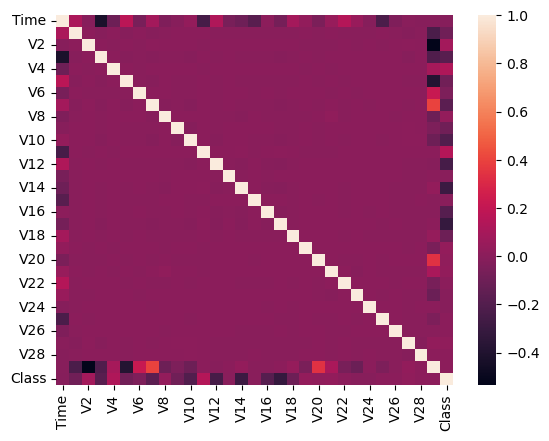

In [8]:
# Корреляционная карта дата-сета
sns.heatmap(df.corr())

### Заметим, что зависимостей совсем не обнаружено

In [9]:
# Проверяем дата-сет на пустые значения
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Пустых значений не обнаружено

In [10]:
# Размерность дата-сета
df.shape

(283726, 31)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [12]:
columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7' ,'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

In [13]:
# Преобразовываем все отрицательные значения в положительные
df[columns] = df[columns].abs()

In [14]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,1.359807,0.072781,2.536347,1.378155,0.338321,0.462388,0.239599,0.098698,0.363787,...,0.018307,0.277838,0.110474,0.066928,0.128539,0.189115,0.133558,0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,0.082361,0.078803,0.085102,0.255425,...,0.225775,0.638672,0.101288,0.339846,0.167170,0.125895,0.008983,0.014724,2.69,0
2,1.0,1.358354,1.340163,1.773209,0.379780,0.503198,1.800499,0.791461,0.247676,1.514654,...,0.247998,0.771679,0.909412,0.689281,0.327642,0.139097,0.055353,0.059752,378.66,0
3,1.0,0.966272,0.185226,1.792993,0.863291,0.010309,1.247203,0.237609,0.377436,1.387024,...,0.108300,0.005274,0.190321,1.175575,0.647376,0.221929,0.062723,0.061458,123.50,0
4,2.0,1.158233,0.877737,1.548718,0.403034,0.407193,0.095921,0.592941,0.270533,0.817739,...,0.009431,0.798278,0.137458,0.141267,0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,11.881118,10.071785,9.834783,2.066656,5.364473,2.606837,4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,0.732789,0.055080,2.035030,0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,1.016226,0.606624,0.395255,0.068472,0.053527,24.79,0
284804,172788.0,1.919565,0.301254,3.249640,0.557828,2.630515,3.031260,0.296827,0.708417,0.432454,...,0.232045,0.578229,0.037501,0.640134,0.265745,0.087371,0.004455,0.026561,67.88,0
284805,172788.0,0.240440,0.530483,0.702510,0.689799,0.377961,0.623708,0.686180,0.679145,0.392087,...,0.265245,0.800049,0.163298,0.123205,0.569159,0.546668,0.108821,0.104533,10.00,0


In [15]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0000,94811.0776,47481.0479,0.0000,54204.7500,84692.5000,139298.0000,172792.0000
V1,283726.0000,1.4071,1.3472,0.0000,0.7218,1.2033,1.9170,56.4075
V2,283726.0000,0.9713,1.3298,0.0000,0.2953,0.7073,1.1931,72.7157
V3,283726.0000,1.1319,0.9975,0.0000,0.4527,0.9736,1.5913,48.3256
V4,283726.0000,1.0593,0.9369,0.0000,0.4086,0.8023,1.4136,16.8753
V5,283726.0000,0.8956,1.0460,0.0000,0.3028,0.6538,1.1802,113.7433
V6,283726.0000,0.9087,0.9738,0.0000,0.3169,0.6573,1.1094,73.3016
V7,283726.0000,0.7359,0.9827,0.0000,0.2443,0.5618,0.9474,120.5895
V8,283726.0000,0.5026,1.0666,0.0000,0.1152,0.2553,0.5242,73.2167
V9,283726.0000,0.8137,0.7335,0.0000,0.2810,0.6216,1.1471,15.5950


### Выбросов не наблюдается

## Заметим, что в столбце Class много одинаковых значений, проверим

In [16]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

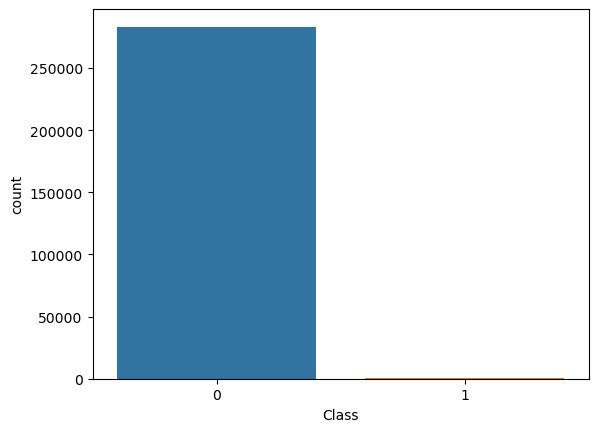

In [17]:
# Визуализируем
sns.countplot(data = df, x = 'Class')

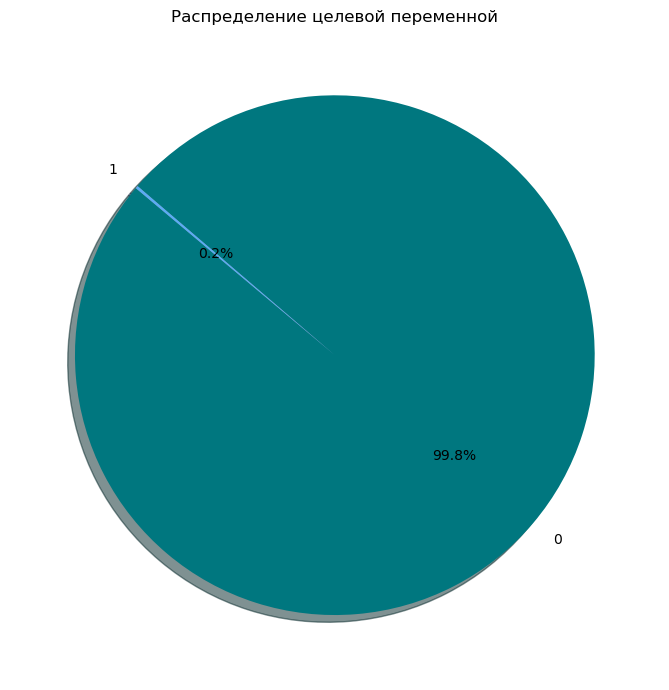

In [18]:
palette = ['#00777F', '#5BABF5', '#AADEFE', '#EAAC9F', '#8AA0AF']
status_counts = df.Class.value_counts()

plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=palette, shadow=True)

plt.title('Распределение целевой переменной')

plt.tight_layout()
plt.show()

# 3. Обучение моделей

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis = 1), 
                                                      df['Class'], 
                                                      test_size=0.3, 
                                                      random_state=19)

In [20]:
dct_main = {}

## KNN

In [21]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)
res1 = accuracy_score(y_test, y_pred)
dct_main['Kneighbors'] = res1
print(res1)

0.9982142437557273


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84963
           1       0.80      0.03      0.05       155

    accuracy                           1.00     85118
   macro avg       0.90      0.51      0.52     85118
weighted avg       1.00      1.00      1.00     85118



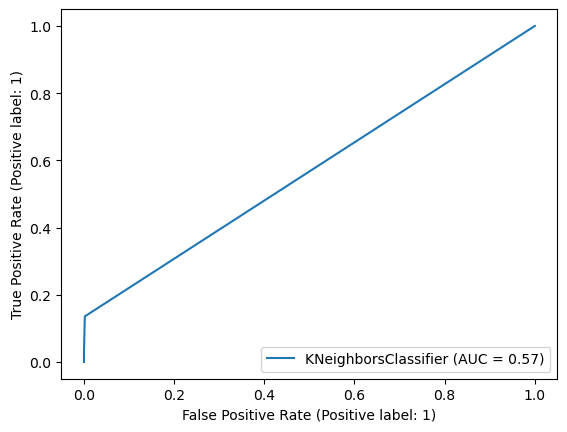

In [24]:
from sklearn.metrics import RocCurveDisplay
knn_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

# GNB

In [25]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

gnb_pred_test = gnb.predict(X_test)

In [26]:
accuracy_score(y_test, gnb_pred_test)
res2 = accuracy_score(y_test, gnb_pred_test)
dct_main['GaussianNB'] = res2
print(res2)

0.9919406001080853


In [27]:
print(classification_report(y_test, gnb_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84963
           1       0.13      0.57      0.21       155

    accuracy                           0.99     85118
   macro avg       0.56      0.78      0.60     85118
weighted avg       1.00      0.99      0.99     85118



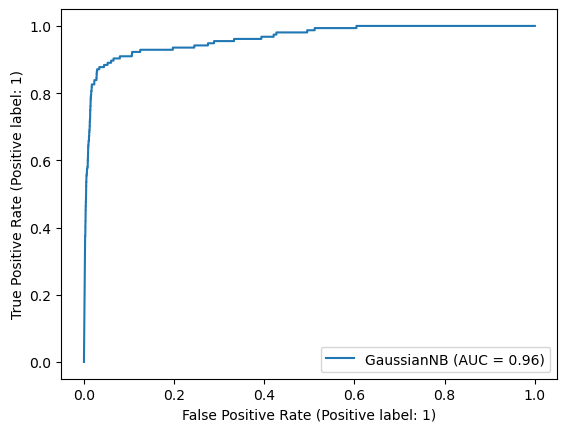

In [28]:
from sklearn.metrics import RocCurveDisplay
gnb_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

# RandomForest

In [29]:
rfc = RandomForestClassifier()

In [30]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
rfc_pred_test = rfc.predict(X_test)

In [32]:
accuracy_score(y_test, rfc_pred_test)
res3 = accuracy_score(y_test, rfc_pred_test)
dct_main['RandomForest'] = res3
print(res3)

0.9994360769754929


In [33]:
print(classification_report(y_test, rfc_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84963
           1       0.97      0.72      0.82       155

    accuracy                           1.00     85118
   macro avg       0.98      0.86      0.91     85118
weighted avg       1.00      1.00      1.00     85118



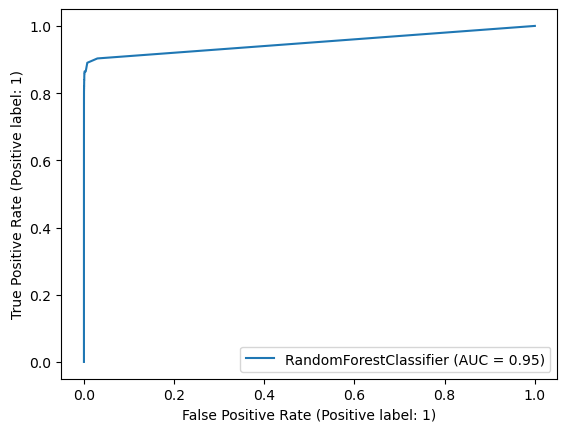

In [34]:
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

# Logistic Regress

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = LogisticRegression(random_state = 42)

lr.fit(X_train, y_train)

lr_pred_test = lr.predict(X_test)

In [36]:
accuracy_score(y_test, lr_pred_test)
res4 = accuracy_score(y_test, lr_pred_test)
dct_main['LogisticRegression'] = res4
print(res4)

0.9990248831034564


In [37]:
print(classification_report(y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84963
           1       0.90      0.52      0.66       155

    accuracy                           1.00     85118
   macro avg       0.95      0.76      0.83     85118
weighted avg       1.00      1.00      1.00     85118



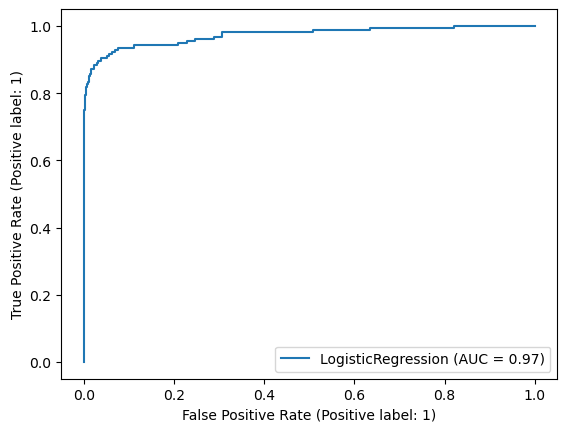

In [38]:
lr_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

# По итогам изучения метрик результатов обучения всех четырех моделей, можно куонстатировать, что лучше всех обучилась модель Logistic Regress.

## Далее будем работать с моделью Logistic Regress

# 4. Визуальное сравнение результатов обучения моделей

[Text(0.5, 0, 'Models'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Accuracy of ML Models')]

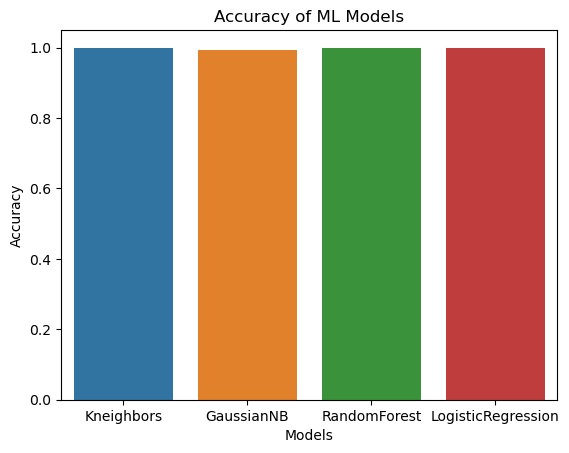

In [39]:
df3 = pd.DataFrame(dct_main.items())
ax = sns.barplot(x=0, y=1, data=df3)
ax.set(xlabel = 'Models', ylabel='Accuracy', title='Accuracy of ML Models')

In [40]:
log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)
log['Classifier'] = dct_main.keys()
log['Accuracy'] = dct_main.values()
log

,Classifier,Accuracy
0,Kneighbors,0.9982
1,GaussianNB,0.9919
2,RandomForest,0.9994
3,LogisticRegression,0.9990


# Настройка гиперпараметров

In [41]:
%%time
# Hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]     
}

logistic = LogisticRegression()

grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Лучший параметр: ", grid_search.best_params_['C'])

Лучший параметр:  10
CPU times: total: 27.8 s
Wall time: 28.2 s


## Обучим новую модель, используя параметр 1 для LogisticRegress

In [42]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = LogisticRegression(random_state = 1)

lr.fit(X_train, y_train)

lr_pred_test = lr.predict(X_test)

In [43]:
accuracy_score(y_test, lr_pred_test)
res4 = accuracy_score(y_test, lr_pred_test)
print(res4)

0.9990248831034564


In [44]:
print(classification_report(y_test, lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84963
           1       0.90      0.52      0.66       155

    accuracy                           1.00     85118
   macro avg       0.95      0.76      0.83     85118
weighted avg       1.00      1.00      1.00     85118



## Сравнивая старую и новую метрику, можно констатировать, что она совершенно не изменилась

# Вывод
### В ходе анализа датасета, были удалены дублирующиеся строки датасета, пустых значений и выбросов обнаружено не было.
### Обучили четыре модели KNN, LR, RF и GNB.

### Лучше всех в результате обучения себя показала модель LogisticRegress.
### Настроив гиперпараметры, было замечено, что метрики не изменились.